In [2]:
import numpy as np
import pandas as pd
from scipy.stats import wilcoxon

import warnings
warnings.filterwarnings('ignore')

In [3]:
class AlgorithmComparisonData():
    def __init__(self, wins, significant_wins, defeats, significant_defeats):
        self.wins = wins
        self.significant_wins = significant_wins
        self.defeats = defeats
        self.significant_defeats = significant_defeats

    def __str__(self):
        return f"wins: {self.wins}({self.significant_wins})\ndefeats: {self.defeats}({self.significant_defeats})"

class ExperimentsDataAnalyzer():

    def __init__(self):
        self.data_lake = {}

    def load_data(self, data_source_name, data_source_path):
        df = pd.read_csv(data_source_path, sep=';')
        self.data_lake[data_source_name] = df

    def get_data_frame(self, data_source_name):
        return self.data_lake[data_source_name]

    def compare(self, ref_alg_datasource_name, target_alg_datasource_name):
        ref_df = self.get_data_frame(ref_alg_datasource_name)
        tgt_df = self.get_data_frame(target_alg_datasource_name)
        
        wins, swins = 0, 0 
        defeats, sdefeats = 0, 0
    
        for i in range(len(tgt_df)):
            data1 = ref_df.iloc[i][1:]
            data2 = tgt_df.iloc[i][1:]
            
            d1_mean = np.mean(data1)
            d2_mean = np.mean(data2) 
        
            is_signif = False
            if d1_mean == 0.0 and d2_mean == 0.0:
                is_signif = False
            else:
                stat, p = wilcoxon(data1, data2, zero_method="zsplit", )
                if p <= 0.05:
                    is_signif = True
            
            if d1_mean > d2_mean:
                wins += 1
                if is_signif:
                    swins += 1
        
            elif d1_mean < d2_mean:
                defeats += 1
                if is_signif:
                    sdefeats += 1

        return AlgorithmComparisonData(wins, swins, defeats, sdefeats)

In [30]:
def get_x1_results(target_config):
    analyzer = ExperimentsDataAnalyzer()

    base_path = "~/code/FIM-CGRASP/results/stats_test_data"

    alg_ref_ds_name = "lshade_costs_by_seed"
    alg_ref_path = f"{base_path}/out(--lshade ).csv"

    alg_target_ds_name = "dmlshade_costs_by_seed"
    alg_target_path = f"{base_path}/out({target_config} ).csv"

    analyzer.load_data(alg_ref_ds_name, alg_ref_path)
    analyzer.load_data(alg_target_ds_name, alg_target_path)

    results = analyzer.compare(alg_ref_ds_name, alg_target_ds_name)

    return results

In [ ]:
print(get_x1_results("--dmlshade --crossgen --insert --k 36 --elsz 47 --dms 26"))

In [34]:
with open("algconfigs") as alg_configs:
    for config in alg_configs:
        print("Config: ", config)
        print(get_x1_results(config.replace("\n", "")))
        print("----")

Config:  --fimlshade --crossgen --elsz 126 --dms 9 --h 36 --s 44

wins: 14(3)
defeats: 10(1)
----
Config:  --fimlshade --crossgen --elsz 54 --dms 61 --h 5 --s 21

wins: 10(0)
defeats: 13(0)
----
Config:  --fimlshade --crossgen --elsz 150 --dms 18 --h 13 --s 42

wins: 14(2)
defeats: 10(0)
----
Config:  --fimlshade --crossgen --elsz 152 --dms 18 --h 13 --s 42
wins: 18(0)
defeats: 6(0)
----


In [16]:
analyzer = ExperimentsDataAnalyzer()

func_number = 4
base_path = f"~/code/FIM-CGRASP/results/generations/LSHADE/cec-f{func_number}/"

analyzer.load_data("pop-costs", base_path + "pop-costs.csv")

gens_count = 2163
pop_generations = {}
for i in range(gens_count):
    df_id = f"pop-g{i+1}"
    analyzer.load_data(df_id, base_path + f"{df_id}.csv")

<Axes: >

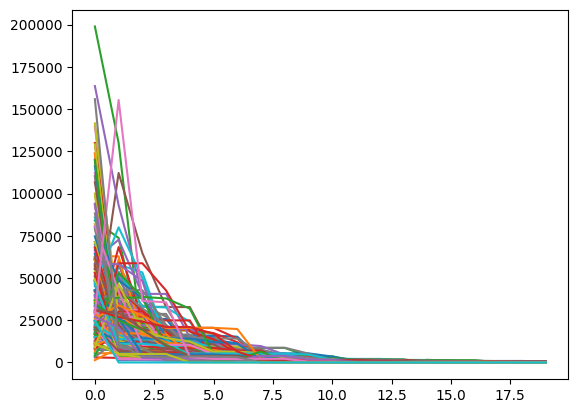

In [30]:
analyzer.get_data_frame(f"pop-costs")[:20].plot(legend=False)

In [24]:
gen_id = 200
analyzer.get_data_frame(f"pop-g{gen_id}")

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,-24.5048,10.0626,-100,-5.71658,57.6163,-100,11.8686,51.0558,62.6619,-36.7060
1,-24.5013,10.0637,-100,-5.71228,57.6226,-100,11.8712,51.0631,62.6654,-36.6995
2,-24.5028,10.0937,-100,-5.71773,57.6110,-100,11.8696,51.0555,62.6614,-36.7138
3,-24.5070,10.0743,-100,-5.71807,57.6070,-100,11.8644,51.0585,62.6620,-36.7075
4,-24.5059,10.0672,-100,-5.72138,57.6136,-100,11.8682,51.0580,62.6622,-36.7060
...,...,...,...,...,...,...,...,...,...,...
122,-24.5037,10.0632,-100,-5.71294,57.6165,-100,11.8669,51.0578,62.6664,-36.7009
123,-24.5057,10.0633,-100,-5.70612,57.6139,-100,11.8709,51.0554,62.6636,-36.7072
124,-24.5040,10.0570,-100,-5.71435,57.6143,-100,11.8631,51.0568,62.6603,-36.7018
125,-24.5008,10.0758,-100,-5.71395,57.6097,-100,11.8715,51.0593,62.6595,-36.7058
